## Aprendizaje Automático

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from IPython.display import Image
%matplotlib inline

/Users/andreselizondo/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
Image("http://oliviaklose.com/content/images/2015/02/2-supervised-vs-unsupervised-1.png")

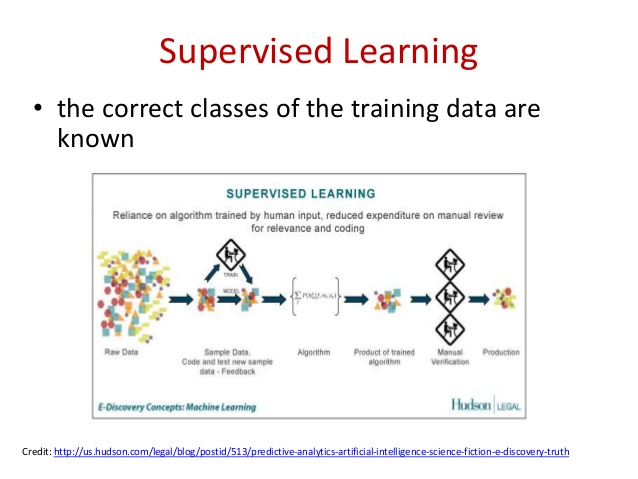

In [3]:
Image("http://image.slidesharecdn.com/introductiontomachinelearning-140907065636-phpapp01/95/introduction-to-machine-learning-11-638.jpg")

## Random Forests

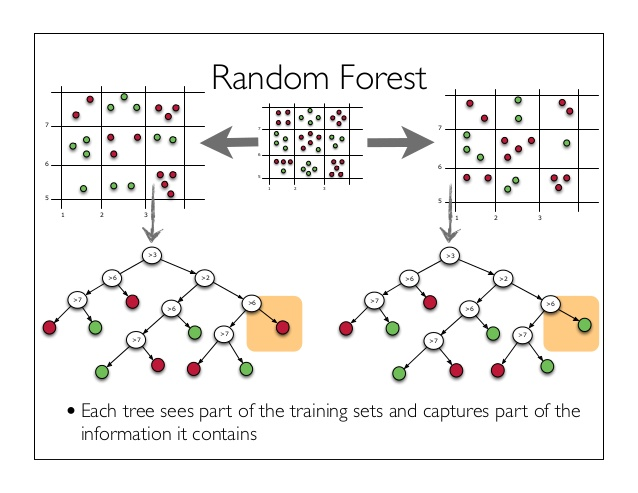

In [5]:
Image("http://image.slidesharecdn.com/janvitekdistributedrandomforest5-2-2013-130504133205-phpapp02/95/jan-vitek-distributedrandomforest522013-8-638.jpg")

In [4]:
df = pd.DataFrame.from_csv("train.csv")

FileNotFoundError: File b'train.csv' does not exist

In [ ]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

score = results_rf.score(x, y)
print("La precisión del Random Forest fue: {0}".format(score))

In [ ]:
model = sm.Logit(y,x)
results = {} 
# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula_ml]
res.summary()

In [ ]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

In [ ]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224, axisbg="#DBDBDB")
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Este sistema reporta 0.77033 como Media Residual.